In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out

In [3]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [48]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Delft, Netherlands"
params.paths.G = "../../data/graphs/Delft.graphml"
params.paths.skim = "../../data/graphs/Delft.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 10000 #meter
params.dist_threshold_min = 1000 #meter

params.d2d.ini_exp_income = 26 #euro
params.d2d.res_wage = 25 #euro
params.d2d.res_wage_eps = 0.1
params.d2d.omega = 0.3 # degree of learning: 0<omega<1
params.d2d.fuel_cost = 0.25 #euro/km

# revenue calculated in the kpi (veh_exp) only consideres the platform.fare.I may fix it. however, the fare
# calculation in the f_match works well.

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = 2 #euro/km
params.platforms.min_fare = 6 # euro
params.platforms.comm_rate = 0.25

params.nP = 100
params.nV = 25
params.nD = 50
params.simTime = 1

In [17]:
sim= MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)

22-02-22 10:10:33-WARNING-Setting up 1h simulation at 2022-02-22 09:41:24 for 10 vehicles and 100 passengers in Delft, Netherlands
22-02-22 10:10:35-WARNING-simulation time 1.5 s
22-02-22 10:10:35-WARNING-assertion tests for simulation results - passed
22-02-22 10:10:37-WARNING-simulation time 1.5 s
22-02-22 10:10:37-WARNING-assertion tests for simulation results - passed


In [49]:
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=driver_opt_out, logger_level=logging.WARNING)

22-02-22 10:51:13-WARNING-Setting up 1h simulation at 2022-02-22 10:21:14 for 25 vehicles and 100 passengers in Delft, Netherlands
22-02-22 10:51:15-WARNING-simulation time 1.6 s
22-02-22 10:51:15-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:16-WARNING-simulation time 1.4 s
22-02-22 10:51:16-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:19-WARNING-simulation time 1.8 s
22-02-22 10:51:19-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:20-WARNING-simulation time 1.6 s
22-02-22 10:51:21-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:22-WARNING-simulation time 1.5 s
22-02-22 10:51:22-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:24-WARNING-simulation time 1.4 s
22-02-22 10:51:24-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:26-WARNING-simulation time 1.4 s
22-02-22 10:51:26-WARNING-assertion tests for simulation results - passed
22-02-22 10:51:

In [50]:
sim.res[0].

,nRIDES,nREJECTED,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,PROFIT,OUT,STARTS_DAY,OPENS_APP,...,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,,,
1,7.0,0.0,3041.0,30.41,32.295,7.6025,24.6925,False,0,0,...,0,1378.0,0,210.0,1663.0,0,0,0,0,7190.0
2,0.0,0.0,0.0,0.00,0.000,0.0000,0.0000,True,0,0,...,0,0.0,0,0.0,0.0,0,0,0,0,0.0
3,6.0,0.0,3132.0,31.32,36.420,7.8300,28.5900,False,0,0,...,0,1124.0,0,180.0,2008.0,0,0,0,0,6894.0
4,0.0,0.0,0.0,0.00,0.000,0.0000,0.0000,True,0,0,...,0,0.0,0,0.0,0.0,0,0,0,0,0.0
5,7.0,0.0,2988.0,29.88,35.325,7.4700,27.8550,False,0,0,...,0,1123.0,0,210.0,1865.0,0,0,0,0,6803.0
6,3.0,0.0,1904.0,19.04,15.975,4.7600,11.2150,False,0,0,...,0,1049.0,0,90.0,855.0,0,0,0,0,7543.0
7,6.0,0.0,2657.0,26.57,31.410,6.6425,24.7675,False,0,0,...,0,983.0,0,180.0,1674.0,0,0,0,0,7026.0
8,7.0,0.0,2945.0,29.45,34.545,7.3625,27.1825,False,0,0,...,0,1132.0,0,210.0,1813.0,0,0,0,0,6748.0
9,5.0,0.0,2640.0,26.40,26.085,6.6000,19.4850,False,0,0,...,0,1251.0,0,150.0,1389.0,0,0,0,0,7031.0


In [40]:
sim.income.expected

,run 0,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10
veh_id,,,,,,,,,,,
1,26,26.88725,29.234825,30.878127,28.731439,30.066757,29.542730,30.225911,31.208888,29.083721,30.550355
2,26,18.20000,20.846058,25.130115,17.591081,21.433569,22.321623,23.525636,26.151673,26.739171,28.733670
3,26,19.87250,22.016808,25.949640,27.754998,29.224249,29.232724,28.550907,27.815635,26.720444,27.457561
4,26,26.18300,29.069600,31.090220,31.421654,32.592658,32.162110,31.175227,33.790409,32.454536,31.874175
5,26,23.18900,24.338358,27.574725,26.898308,26.664065,25.577596,17.904317,22.216749,23.271424,26.048043
6,26,26.74700,28.517150,29.756255,31.375878,30.684115,31.035380,32.046266,33.096636,31.078645,33.279552
7,26,26.97425,28.480475,29.534833,28.802133,30.016493,29.478295,30.708807,31.366165,30.730565,29.423896
8,26,18.20000,20.846058,25.130115,17.591081,21.433569,22.321623,23.525636,26.151673,26.938671,28.856820
9,26,27.11675,18.981725,23.825082,23.361822,25.473088,17.831162,20.382313,23.951347,24.485643,26.897995


In [41]:
sim.income.actual

,run 0,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9
veh_id,,,,,,,,,,
1,28.9575,34.7125,34.7125,23.7225,33.1825,28.3200,31.8200,33.5025,24.1250,33.9725
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,32.6000,28.1100,33.3875
3,5.5750,0.0000,0.0000,31.9675,32.6525,29.2525,26.9600,26.1000,24.1650,29.1775
4,26.6100,35.8050,35.8050,32.1950,35.3250,31.1575,28.8725,39.8925,29.3375,30.5200
5,16.6300,0.0000,0.0000,25.3200,26.1175,23.0425,0.0000,0.0000,0.0000,0.0000
6,28.4900,32.6475,32.6475,35.1550,29.0700,31.8550,34.4050,35.5475,26.3700,38.4150
7,29.2475,31.9950,31.9950,27.0925,32.8500,28.2225,33.5800,32.9000,29.2475,26.3750
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,28.7750,33.3325
9,29.7225,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34.7400,0.0000


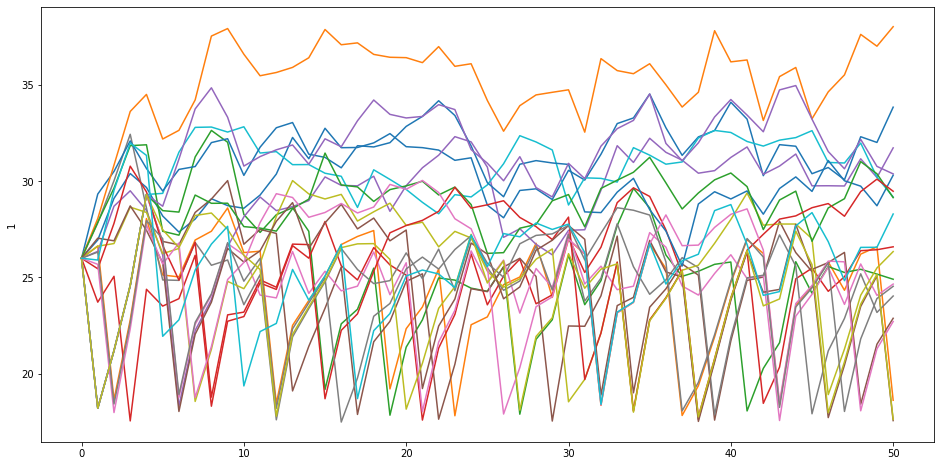

In [46]:
lx = [i for i in range(0,sim.run_ids[-1]+2,1)]
fig, ax = plt.subplots(figsize=(16,8))

for veh in range(1, params.nV+1):
    sns.lineplot(x=lx, y=sim.income.expected.loc[veh], markers=True)

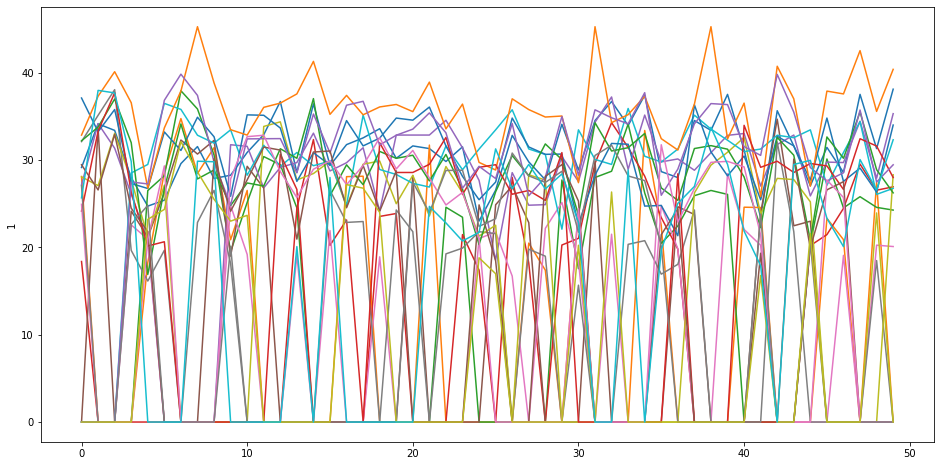

In [47]:
fig, ax = plt.subplots(figsize=(16,8))

for veh in range(1, params.nV+1):
    sns.lineplot(x=sim.run_ids, y=sim.income.actual.loc[veh], markers=True)

In [ ]:
revenue - operating cost = profit

In [ ]:
1- fixed positions v/
2- multi platform setting v/
3- minimum distance thresholld v/
4- passengers loose patience
5- the position of traveller? should it change?